# **IMPORT & LOAD DATA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset
df = pd.read_csv('credit_risk_dataset.csv')

# Menampilkan 5 baris teratas
print("--- 5 Data Teratas ---")
display(df.head())

# Informasi Dataset (Tipe data & Missing Value awal)
print("\n--- Info Dataset ---")
df.info()

# Cek Proporsi Target (Loan Status)
print("\n--- Proporsi Target (Loan Status) ---")
print(df['loan_status'].value_counts(normalize=True))

--- 5 Data Teratas ---


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4



--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB

--- Prop

# **EDA VISUALIZATION**

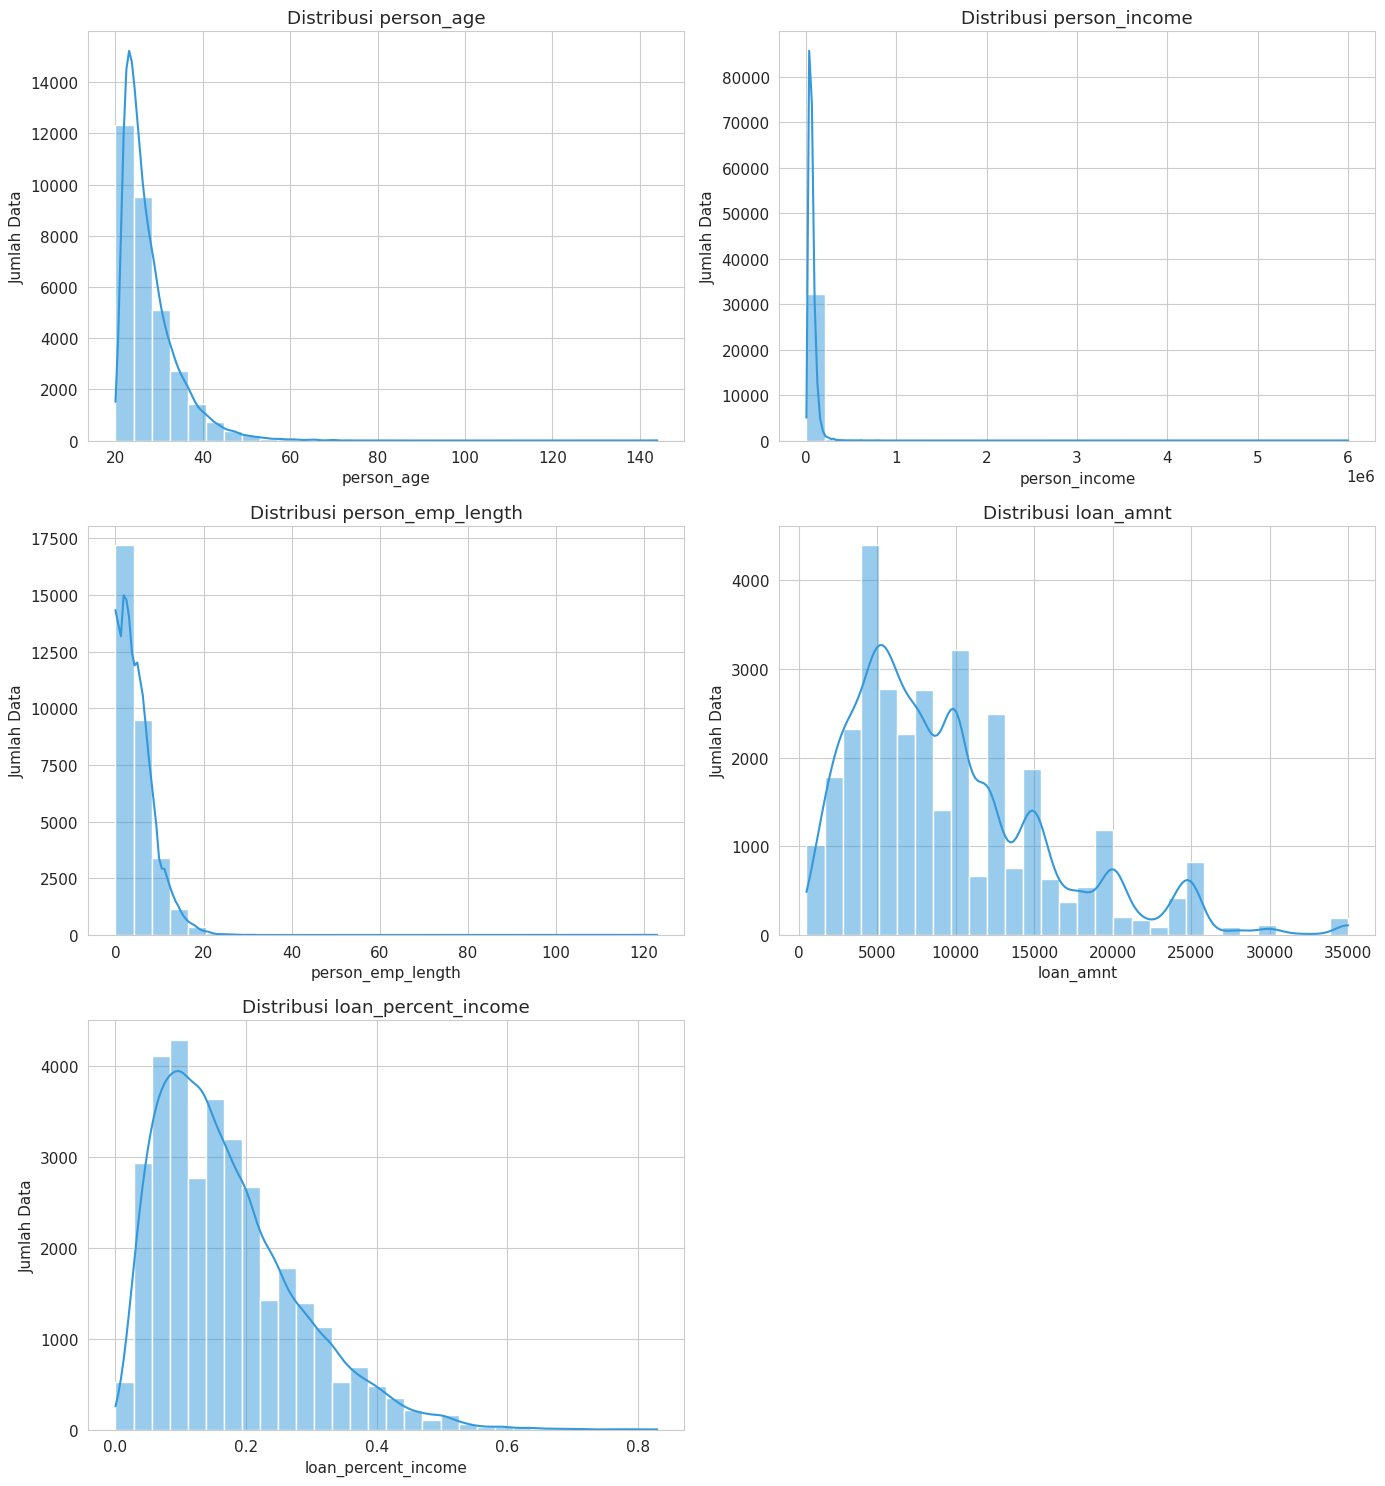

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})

num_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_percent_income'
]

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(
        df[col],
        bins=30,
        kde=True,
        ax=axes[i],
        color="#3498db"
    )
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah Data')

# Hapus subplot kosong jika ada
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

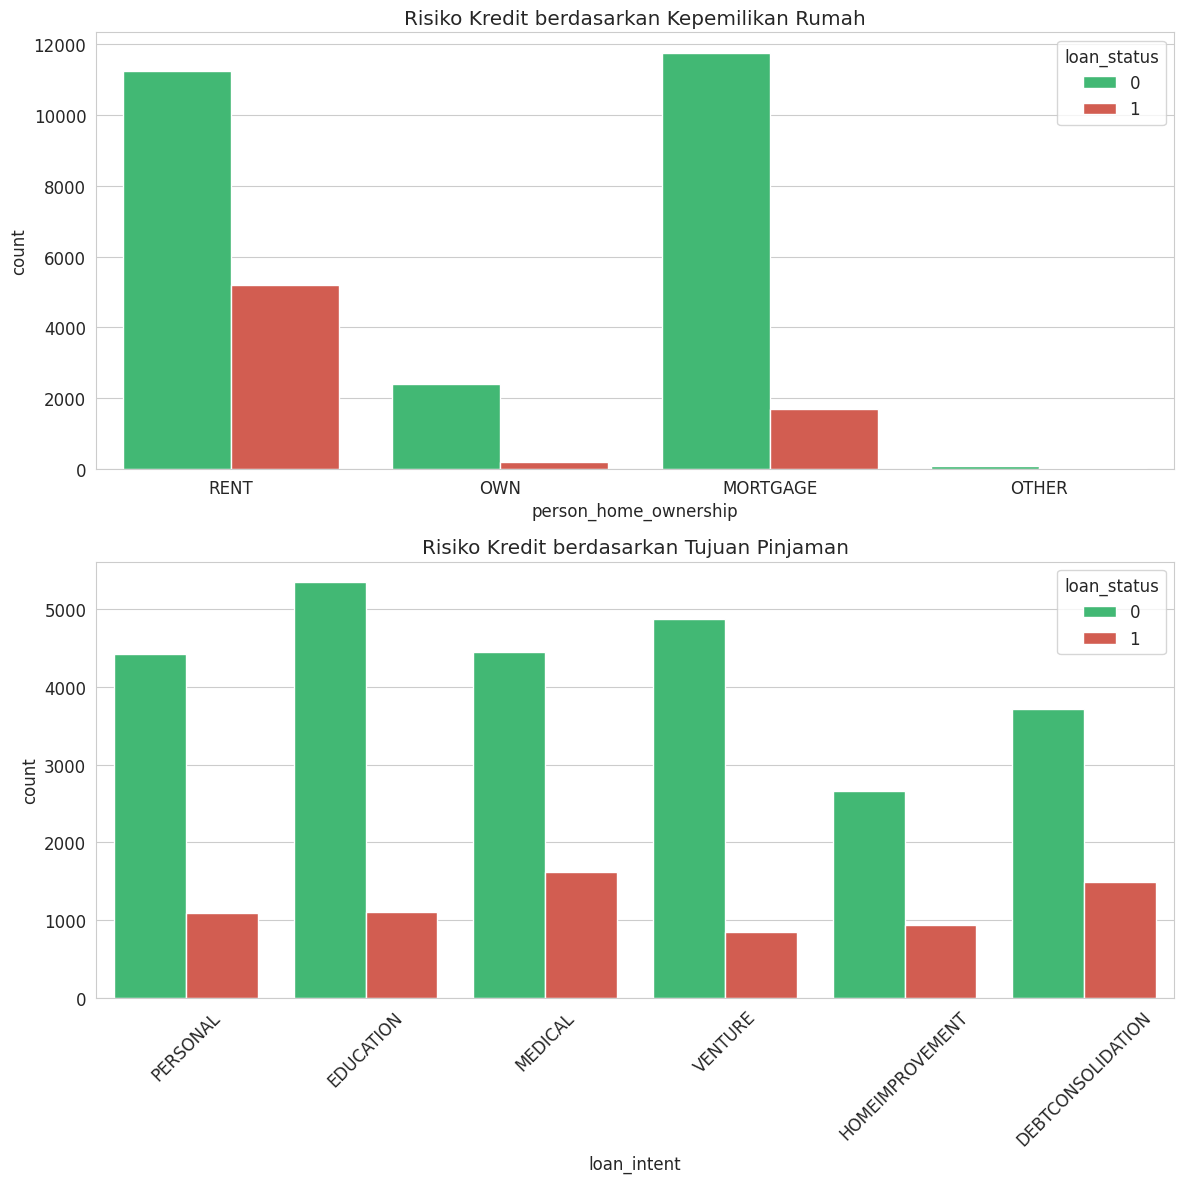

In [3]:
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Definisikan warna: Biru (Lancar), Merah (Gagal Bayar)
custom_palette = {0: "#2ecc71", 1: "#e74c3c"}

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# 1. Home Ownership
sns.countplot(x='person_home_ownership', hue='loan_status', data=df, ax=ax[0], palette=custom_palette)
ax[0].set_title('Risiko Kredit berdasarkan Kepemilikan Rumah')

# 2. Loan Intent (Tujuan Pinjaman)
sns.countplot(x='loan_intent', hue='loan_status', data=df, ax=ax[1], palette=custom_palette)
ax[1].set_title('Risiko Kredit berdasarkan Tujuan Pinjaman')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

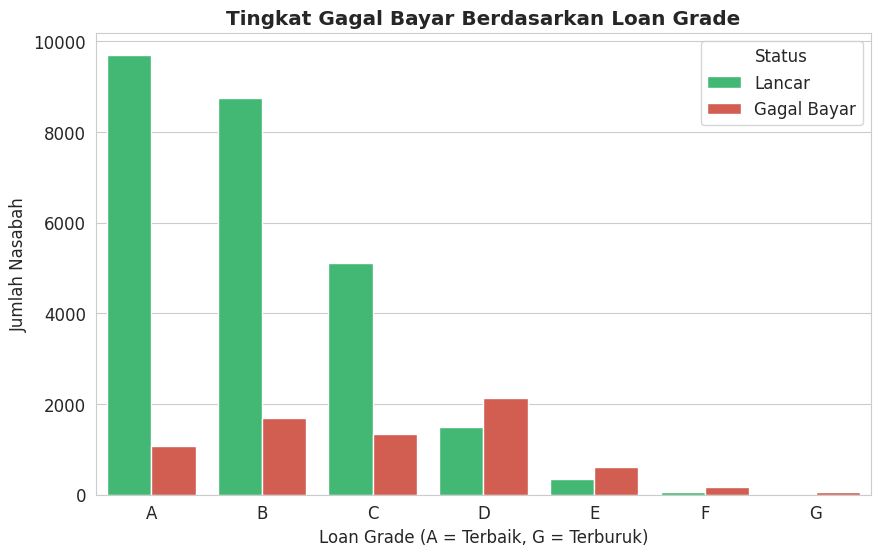

In [4]:
plt.figure(figsize=(10, 6))
# Mengurutkan grade dari A ke G
order_grade = sorted(df['loan_grade'].unique())

sns.countplot(x='loan_grade', hue='loan_status', data=df, order=order_grade, palette=custom_palette)
plt.title('Tingkat Gagal Bayar Berdasarkan Loan Grade', fontweight='bold')
plt.xlabel('Loan Grade (A = Terbaik, G = Terburuk)')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Status', labels=['Lancar', 'Gagal Bayar'])
plt.show()

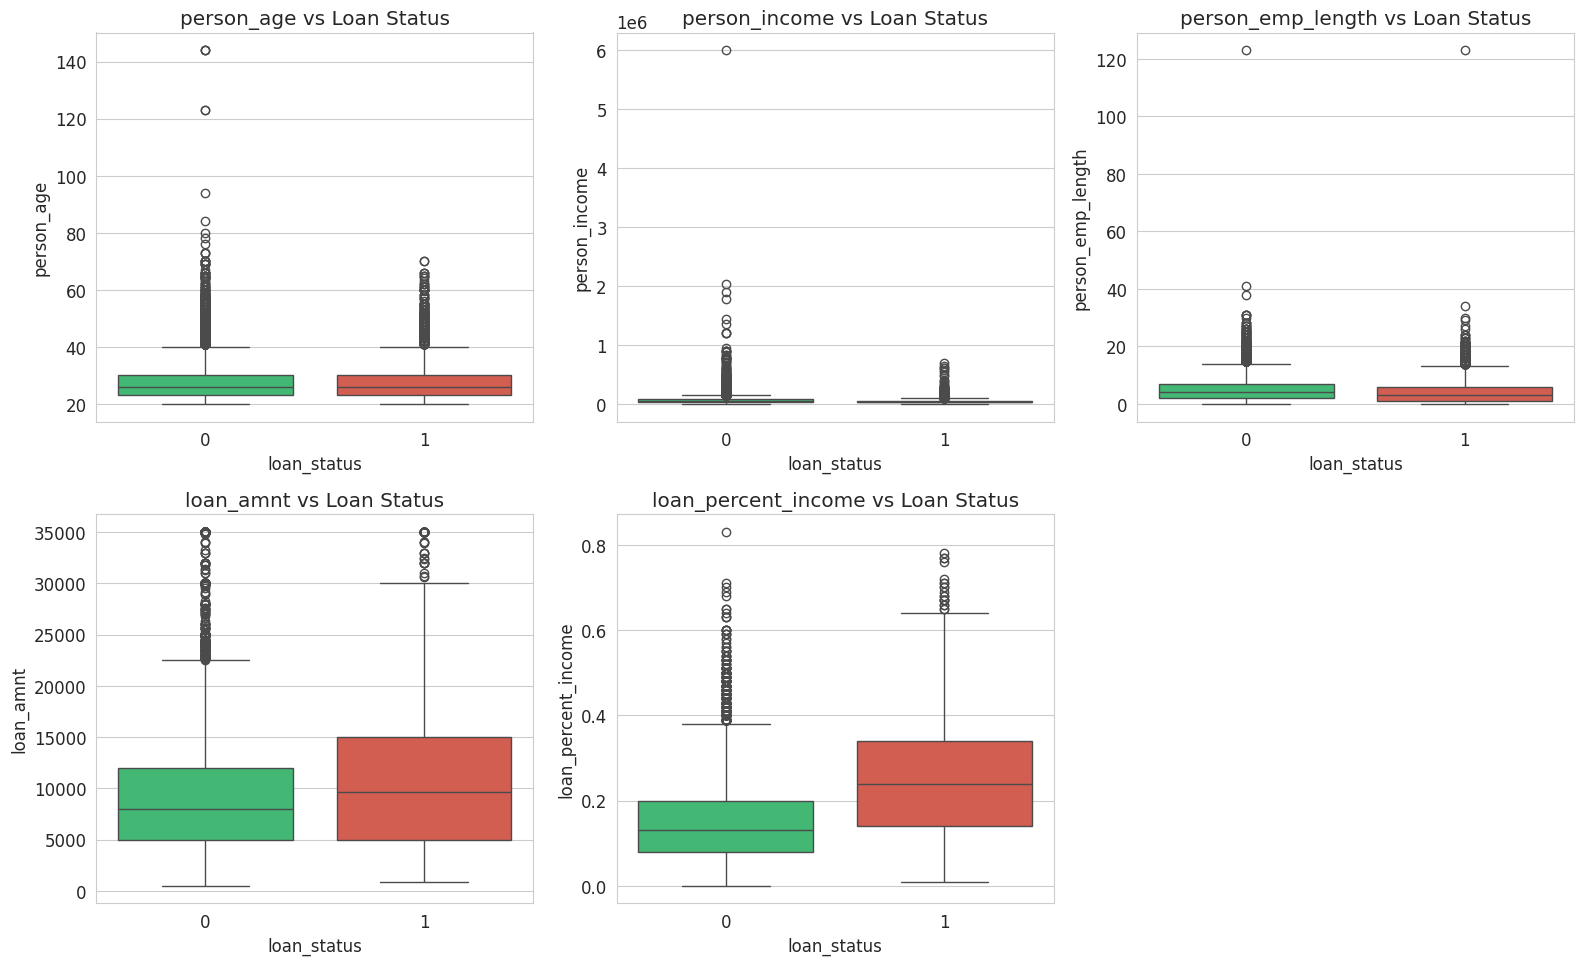

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(
        x='loan_status',
        y=col,
        data=df,
        ax=axes[i],
        palette=custom_palette,
        hue='loan_status',
        legend=False
    )
    axes[i].set_title(f'{col} vs Loan Status')

for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

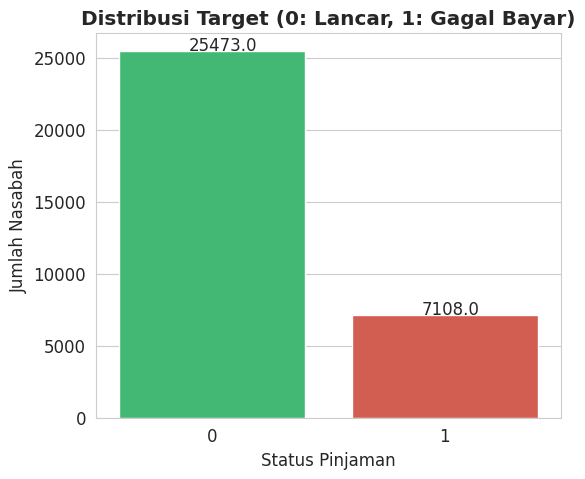

In [6]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='loan_status', data=df, palette=custom_palette, hue='loan_status', legend=False)
plt.title('Distribusi Target (0: Lancar, 1: Gagal Bayar)', fontweight='bold')
plt.xlabel('Status Pinjaman')
plt.ylabel('Jumlah Nasabah')

# Menambahkan label angka di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))
plt.show()

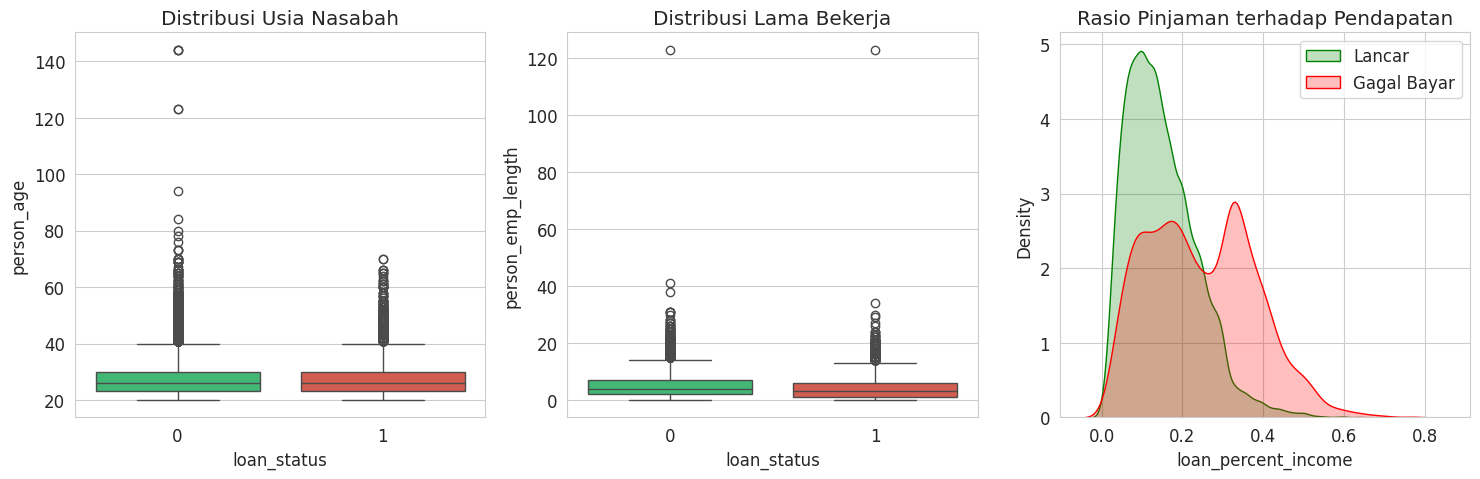

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Usia vs Status
sns.boxplot(x='loan_status', y='person_age', data=df, ax=ax[0], palette=custom_palette, hue='loan_status', legend=False)
ax[0].set_title('Distribusi Usia Nasabah')

# Lama Bekerja vs Status
sns.boxplot(x='loan_status', y='person_emp_length', data=df, ax=ax[1], palette=custom_palette, hue='loan_status', legend=False)
ax[1].set_title('Distribusi Lama Bekerja')

sns.kdeplot(df[df['loan_status']==0]['loan_percent_income'], fill=True, color="green", label="Lancar", ax=ax[2])
sns.kdeplot(df[df['loan_status']==1]['loan_percent_income'], fill=True, color="red", label="Gagal Bayar", ax=ax[2])
ax[2].set_title('Rasio Pinjaman terhadap Pendapatan')
ax[2].legend()

plt.show()

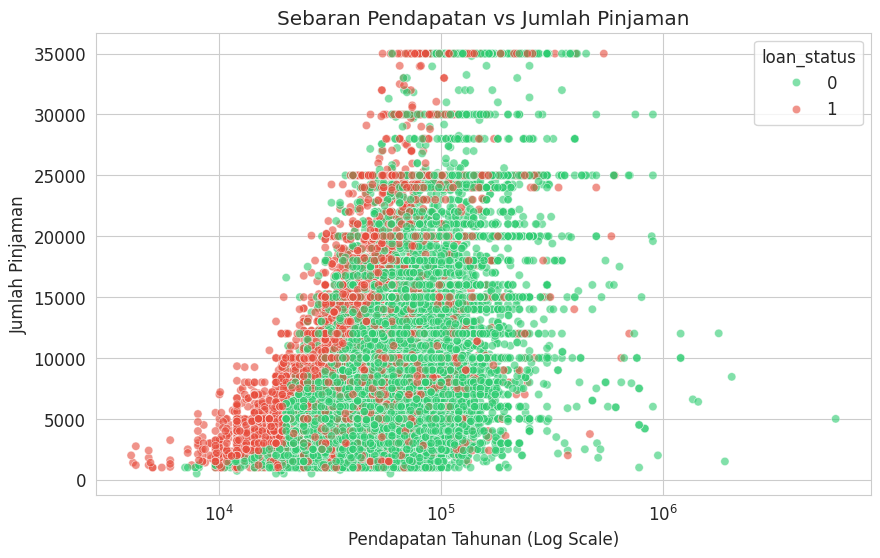

In [8]:
# Melihat sebaran pinjaman berdasarkan gaji.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df, palette=custom_palette, alpha=0.6)
plt.title('Sebaran Pendapatan vs Jumlah Pinjaman')
plt.xscale('log') # Menggunakan skala log karena income biasanya rentangnya jauh
plt.xlabel('Pendapatan Tahunan (Log Scale)')
plt.ylabel('Jumlah Pinjaman')
plt.show()

# **SELECTION FEATURES & CLEANING**

(mengatasi nilai hilang, seleksi fitur dan hapus outlier yang tidak masuk akal serta menghapus data duplikat)

In [9]:
selected_features = [
    'person_age', 'person_income', 'person_emp_length',
    'person_home_ownership', 'loan_amnt', 'loan_grade',
    'loan_intent',  'loan_percent_income',
    'loan_status' # Target
]
df_clean = df[selected_features].copy()

# Menampilkan 5 baris teratas
print("--- 5 Data Teratas ---")
display(df_clean.head())

# Statistik Deskriptif
print("\n--- Statistik Deskriptif ---")
display(df_clean.describe())

--- 5 Data Teratas ---


,person_age,person_income,person_emp_length,person_home_ownership,loan_amnt,loan_grade,loan_intent,loan_percent_income,loan_status
0,22,59000,123.0,RENT,35000,D,PERSONAL,0.59,1
1,21,9600,5.0,OWN,1000,B,EDUCATION,0.10,0
2,25,9600,1.0,MORTGAGE,5500,C,MEDICAL,0.57,1
3,23,65500,4.0,RENT,35000,C,MEDICAL,0.53,1
4,24,54400,8.0,RENT,35000,C,MEDICAL,0.55,1



--- Statistik Deskriptif ---


,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income,loan_status
count,32581.000000,3.258100e+04,31686.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,0.170203,0.218164
std,6.348078,6.198312e+04,4.142630,6322.086646,0.106782,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,0.090000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,0.150000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,0.230000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,0.830000,1.000000


In [10]:

# Cek missing value
print("Missing values sebelum handling:\n", df_clean.isnull().sum())

Missing values sebelum handling:
 person_age                 0
person_income              0
person_emp_length        895
person_home_ownership      0
loan_amnt                  0
loan_grade                 0
loan_intent                0
loan_percent_income        0
loan_status                0
dtype: int64


In [11]:
# Isi missing value pada person_emp_length dengan Median
median_emp = df_clean['person_emp_length'].median()
df_clean['person_emp_length'] = df_clean['person_emp_length'].fillna(median_emp)

print("Missing values setelah handling:\n", df_clean.isnull().sum())

Missing values setelah handling:
 person_age               0
person_income            0
person_emp_length        0
person_home_ownership    0
loan_amnt                0
loan_grade               0
loan_intent              0
loan_percent_income      0
loan_status              0
dtype: int64


In [12]:
# Hapus Outlier Tidak Masuk Akal (Logika Bisnis) seperti :
# Umur > 100 tahun
# Pengalaman kerja > Umur
# Pengalaman kerja > 60 tahun (sangat jarang/pensiun)

print(f"\nJumlah baris sebelum hapus outlier: {len(df_clean)}")

# Filter data
df_clean = df_clean[df_clean['person_age'] <= 100]
df_clean = df_clean[df_clean['person_emp_length'] <= 60]

print(f"Jumlah baris setelah hapus outlier: {len(df_clean)}")


Jumlah baris sebelum hapus outlier: 32581
Jumlah baris setelah hapus outlier: 32574


In [13]:

# Cek jumlah data duplikat
duplicate_count = df_clean.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 733


In [14]:
# Hapus data duplikat
df_clean = df_clean.drop_duplicates()

print(f"Jumlah data setelah hapus duplikat: {df_clean.shape[0]}")

Jumlah data setelah hapus duplikat: 31841


# **EDA SETELAH CLEANING**

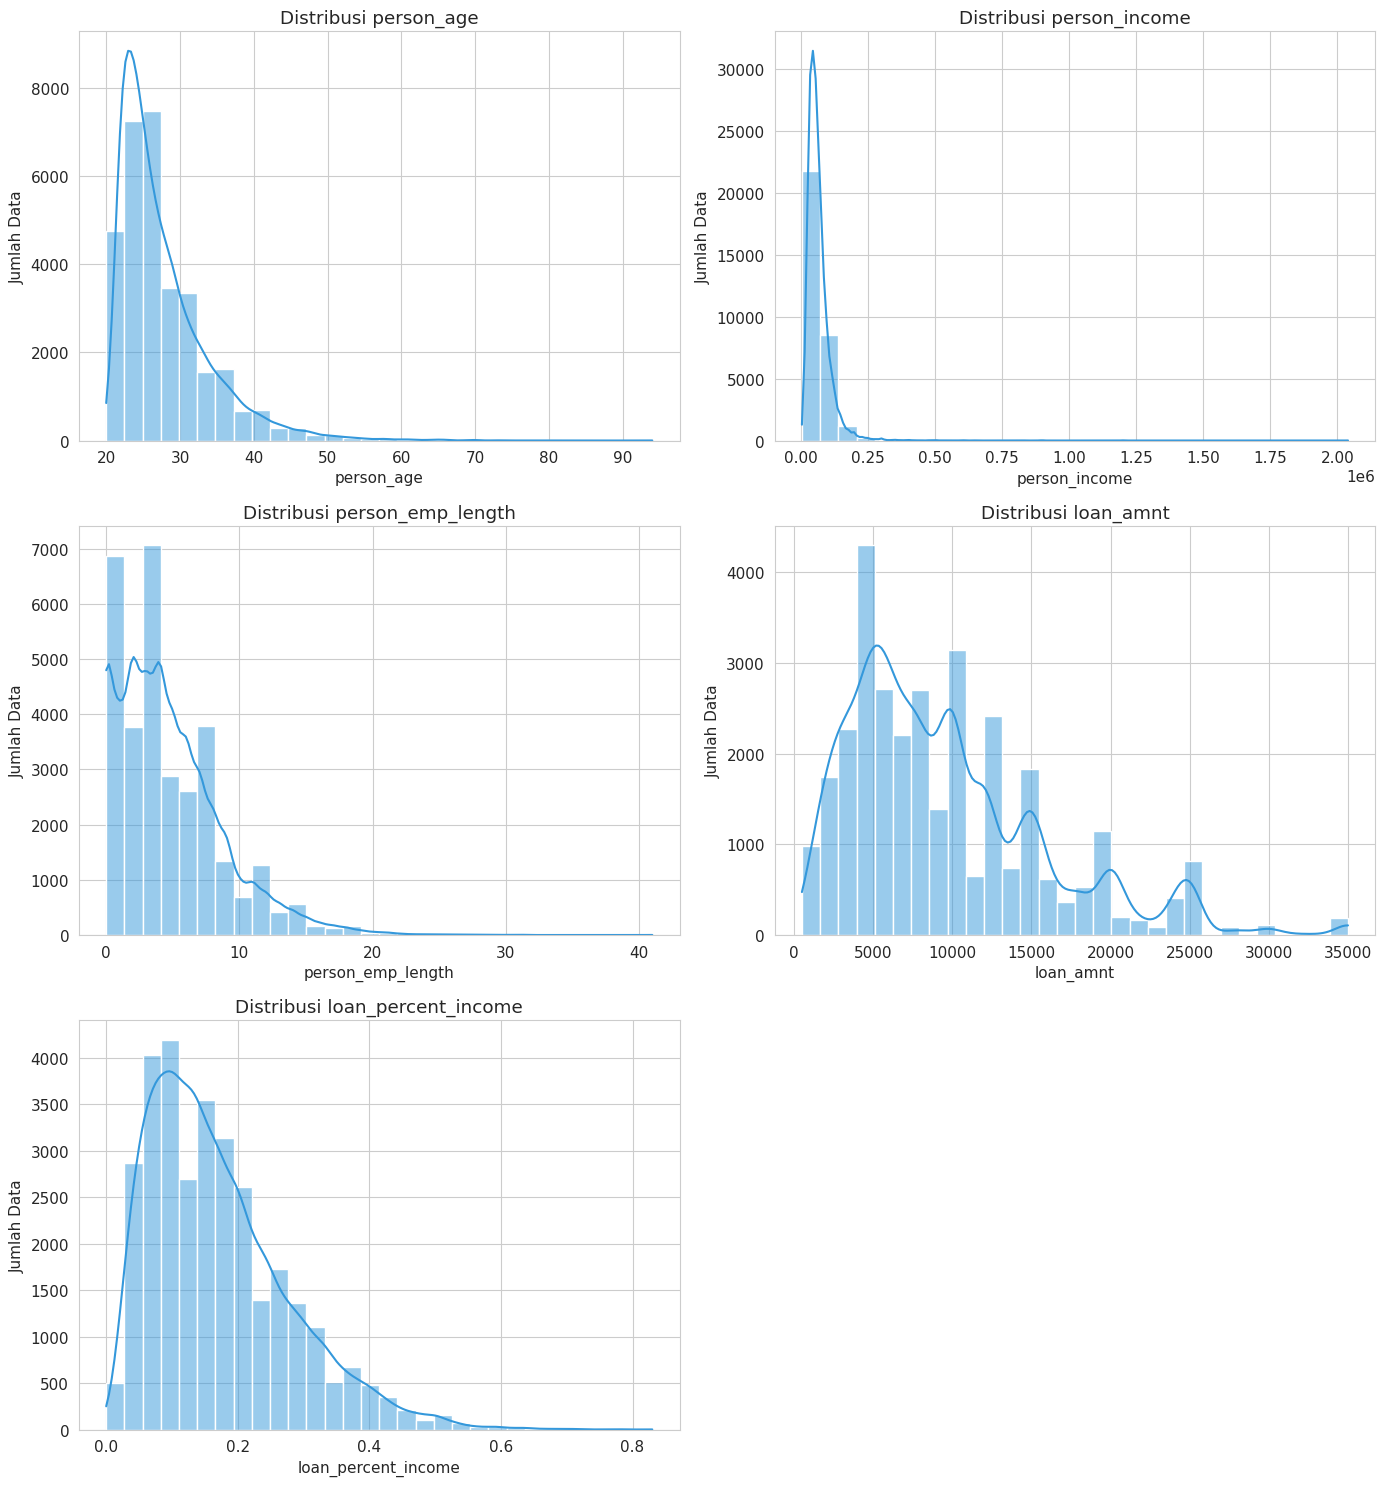

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})

num_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_percent_income'
]

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(
        df_clean[col],
        bins=30,
        kde=True,
        ax=axes[i],
        color="#3498db"
    )
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah Data')

# Hapus subplot kosong jika ada
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

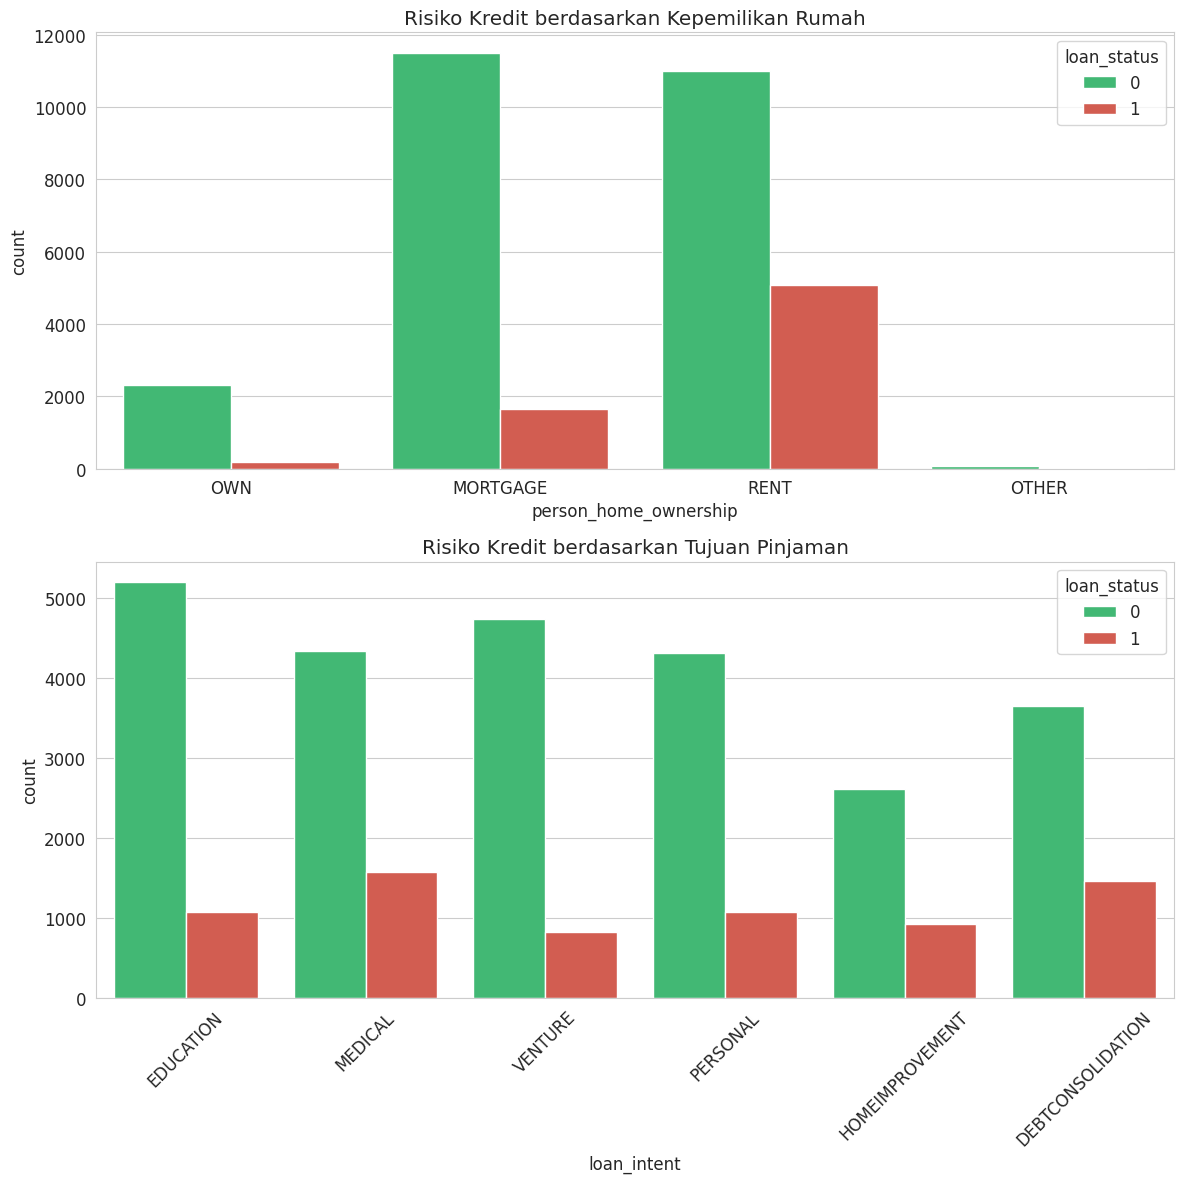

In [16]:
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})
palette=custom_palette
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# 1. Home Ownership
sns.countplot(x='person_home_ownership', hue='loan_status', data=df_clean, ax=ax[0], palette=custom_palette)
ax[0].set_title('Risiko Kredit berdasarkan Kepemilikan Rumah')

# 2. Loan Intent (Tujuan Pinjaman)
sns.countplot(x='loan_intent', hue='loan_status', data=df_clean, ax=ax[1], palette=custom_palette)
ax[1].set_title('Risiko Kredit berdasarkan Tujuan Pinjaman')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

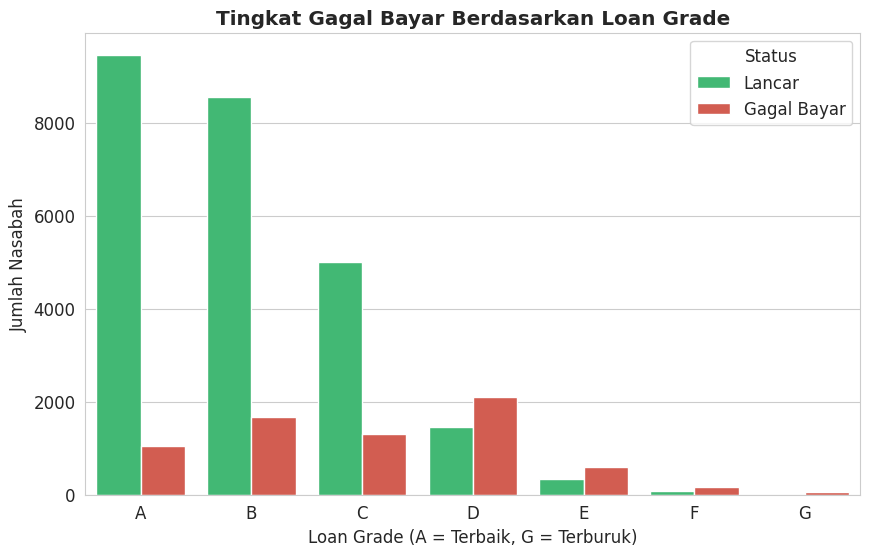

In [17]:
plt.figure(figsize=(10, 6))
# Mengurutkan grade dari A ke G
order_grade = sorted(df_clean['loan_grade'].unique())

sns.countplot(x='loan_grade', hue='loan_status', data=df_clean, order=order_grade, palette=custom_palette)
plt.title('Tingkat Gagal Bayar Berdasarkan Loan Grade', fontweight='bold')
plt.xlabel('Loan Grade (A = Terbaik, G = Terburuk)')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Status', labels=['Lancar', 'Gagal Bayar'])
plt.show()

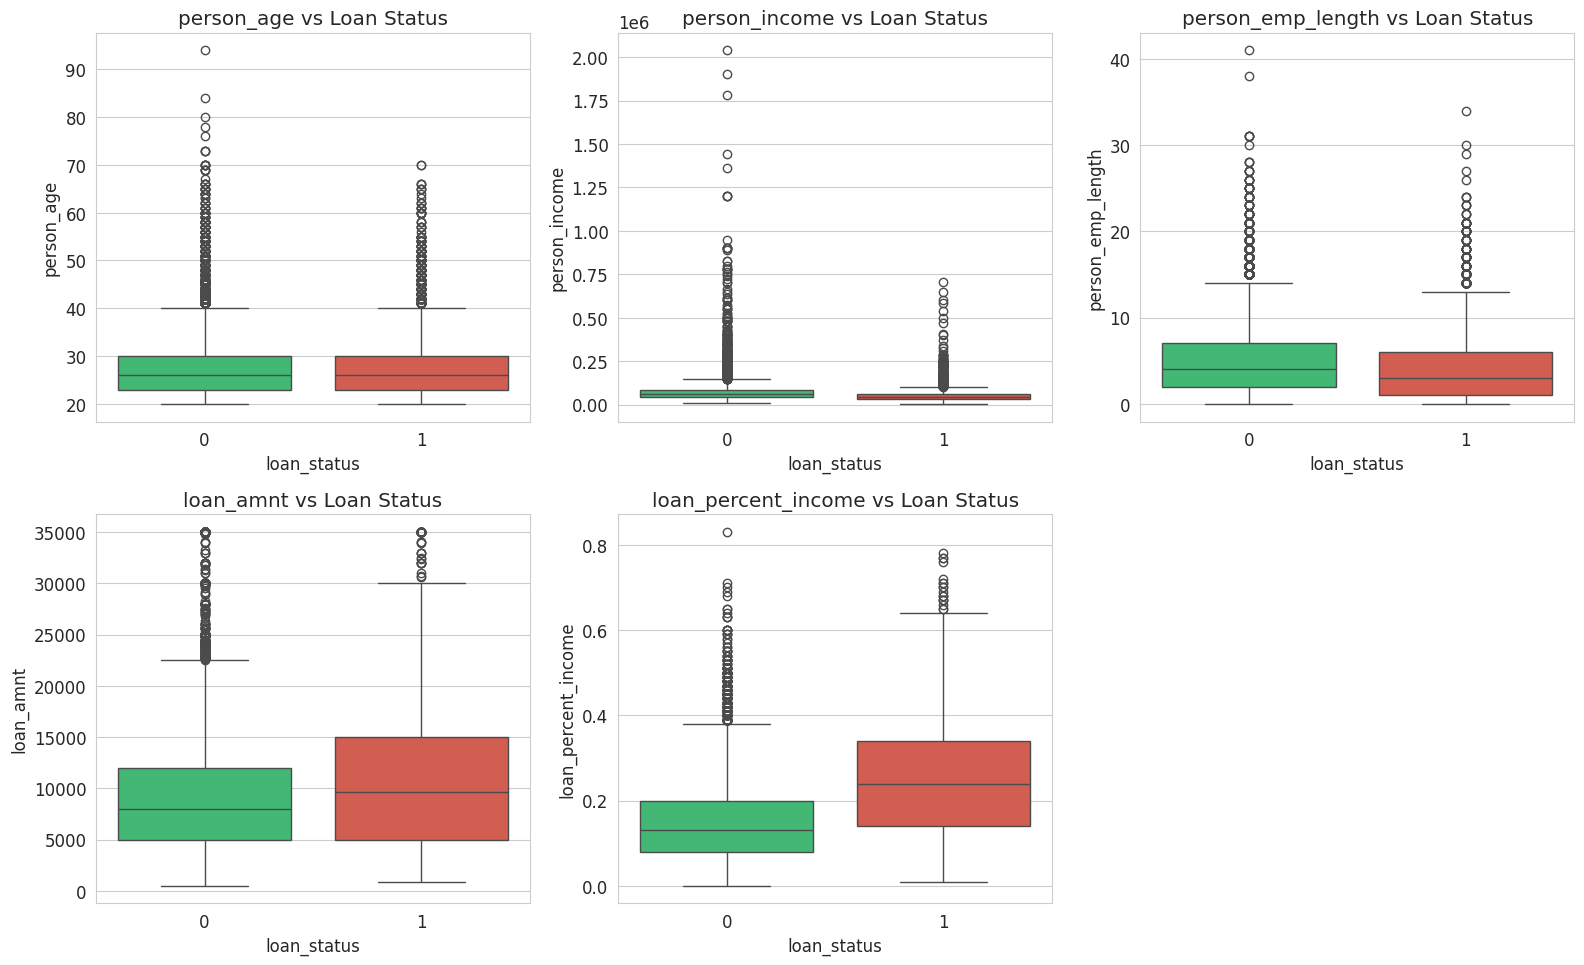

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(
        x='loan_status',
        y=col,
        data=df_clean,
        ax=axes[i],
        palette=custom_palette,
        hue='loan_status',
        legend=False
    )
    axes[i].set_title(f'{col} vs Loan Status')

for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

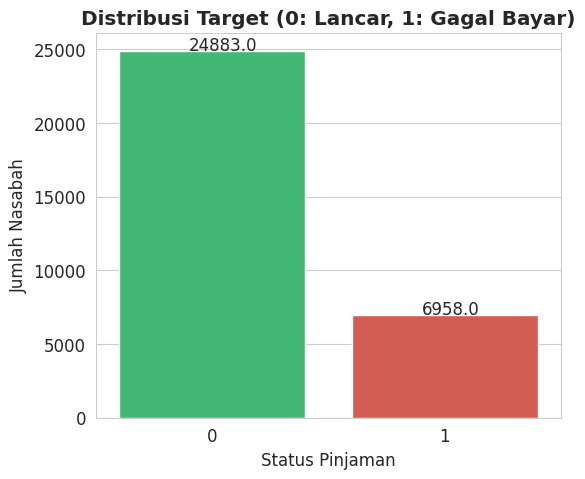

In [19]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='loan_status', data=df_clean, palette=custom_palette, hue='loan_status', legend=False)
plt.title('Distribusi Target (0: Lancar, 1: Gagal Bayar)', fontweight='bold')
plt.xlabel('Status Pinjaman')
plt.ylabel('Jumlah Nasabah')

# Menambahkan label angka di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))
plt.show()

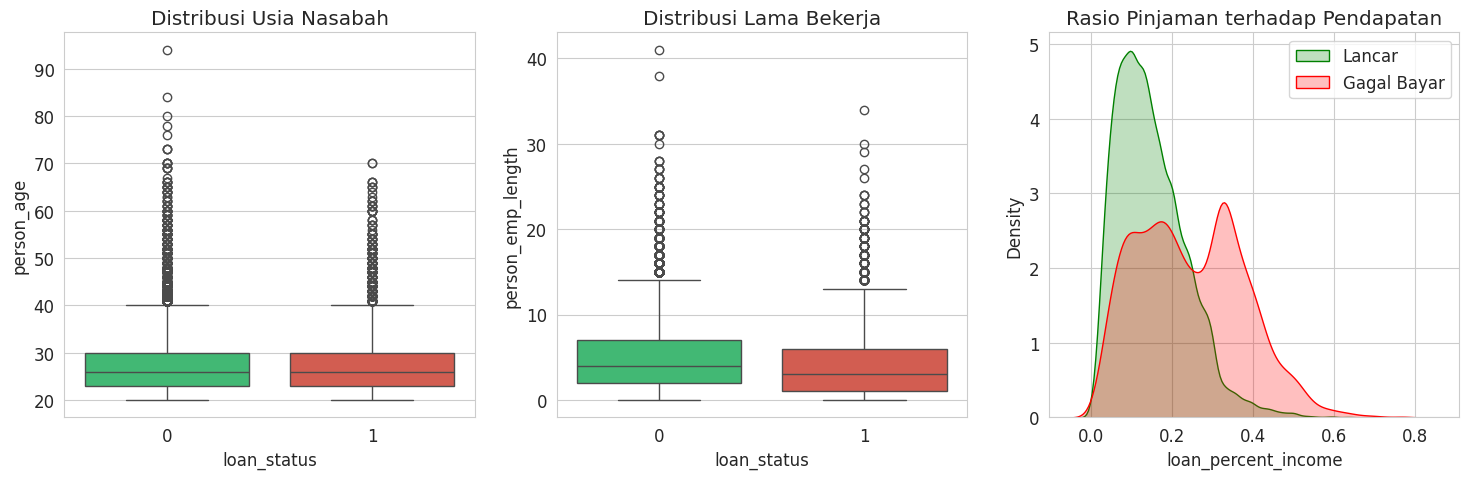

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Usia vs Status
sns.boxplot(x='loan_status', y='person_age', data=df_clean, ax=ax[0], palette=custom_palette, hue='loan_status', legend=False)
ax[0].set_title('Distribusi Usia Nasabah')

# Lama Bekerja vs Status
sns.boxplot(x='loan_status', y='person_emp_length', data=df_clean, ax=ax[1], palette=custom_palette, hue='loan_status', legend=False)
ax[1].set_title('Distribusi Lama Bekerja')

sns.kdeplot(df_clean[df_clean['loan_status']==0]['loan_percent_income'], fill=True, color="green", label="Lancar", ax=ax[2])
sns.kdeplot(df_clean[df_clean['loan_status']==1]['loan_percent_income'], fill=True, color="red", label="Gagal Bayar", ax=ax[2])
ax[2].set_title('Rasio Pinjaman terhadap Pendapatan')
ax[2].legend()

plt.show()

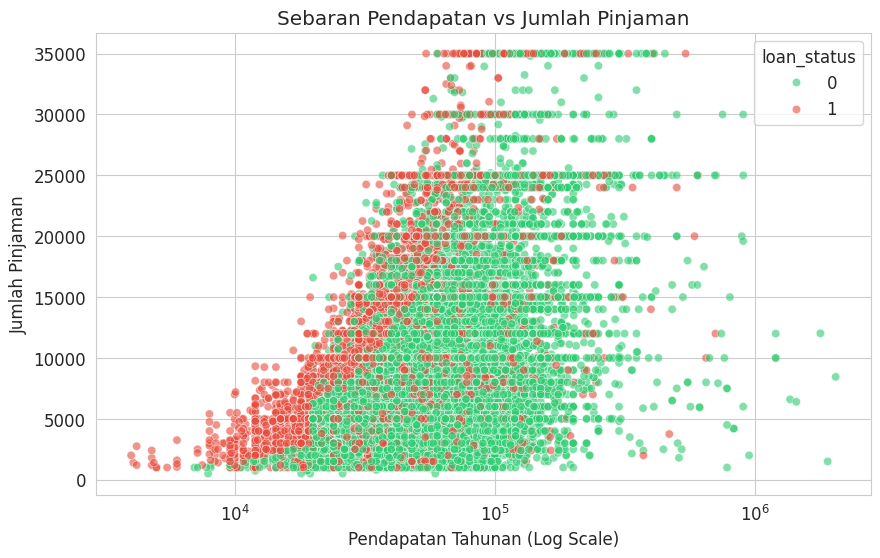

In [21]:
# Melihat sebaran pinjaman berdasarkan gaji.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df_clean, palette=custom_palette, alpha=0.6)
plt.title('Sebaran Pendapatan vs Jumlah Pinjaman')
plt.xscale('log') # Menggunakan skala log karena income biasanya rentangnya jauh
plt.xlabel('Pendapatan Tahunan (Log Scale)')
plt.ylabel('Jumlah Pinjaman')
plt.show()

# **ENCODING VARIABEL KATEGORIKAL**

MORTCAGE 0, OTHER 1, OWN 2, RENT 3

DEBTCONSOLIDATION = 0, EDUCATION = 1, HOMEIMPROVEMENT = 2, MEDICAL = 3, PERSONAL = 4, VENTURE = 5

A = 0, B = 1, C = 2, D = 3, E = 4, F = 5, G = 6

In [22]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom kategorikal
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', ]

label_encoders = {} # Menyimpan encoder untuk referensi balik

print("--- PETA PENGUBAHAN (ENCODING) ---")
for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

    # Menampilkan mapping
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"\nVariabel: {col}")
    print(mapping)

print("\n--- Data Setelah Encoding ---")
display(df_clean.head())

--- PETA PENGUBAHAN (ENCODING) ---

Variabel: person_home_ownership
{'MORTGAGE': np.int64(0), 'OTHER': np.int64(1), 'OWN': np.int64(2), 'RENT': np.int64(3)}

Variabel: loan_intent
{'DEBTCONSOLIDATION': np.int64(0), 'EDUCATION': np.int64(1), 'HOMEIMPROVEMENT': np.int64(2), 'MEDICAL': np.int64(3), 'PERSONAL': np.int64(4), 'VENTURE': np.int64(5)}

Variabel: loan_grade
{'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'E': np.int64(4), 'F': np.int64(5), 'G': np.int64(6)}

--- Data Setelah Encoding ---


,person_age,person_income,person_emp_length,person_home_ownership,loan_amnt,loan_grade,loan_intent,loan_percent_income,loan_status
1,21,9600,5.0,2,1000,1,1,0.10,0
2,25,9600,1.0,0,5500,2,3,0.57,1
3,23,65500,4.0,3,35000,2,3,0.53,1
4,24,54400,8.0,3,35000,2,3,0.55,1
5,21,9900,2.0,2,2500,0,5,0.25,1


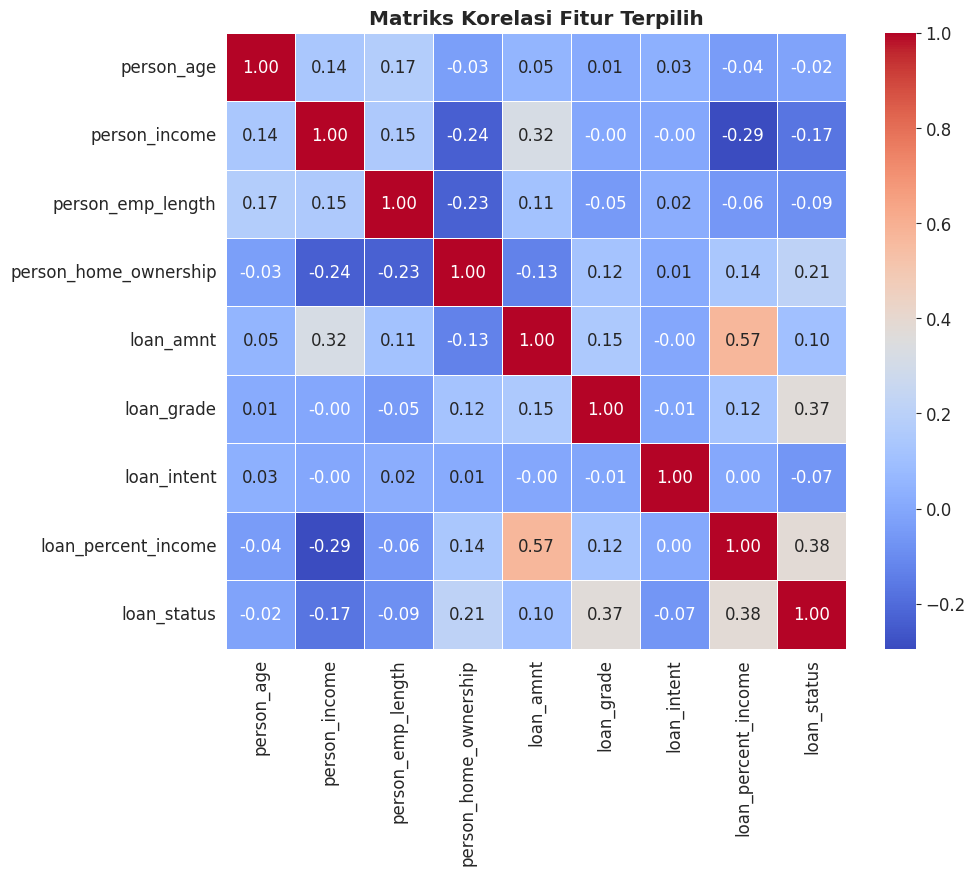

In [23]:

# 4. Hitung Korelasi
plt.figure(figsize=(10, 8))
corr_matrix = df_clean.corr()

# 5. Tampilkan Heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Terpilih', fontweight='bold')
plt.show()

# **SPLIT & SCALING**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan Fitur (X) dan Target (y)
X = df_clean.drop('loan_status', axis=1)
y = df_clean['loan_status']

# Split Data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y memastikan proporsi gagal bayar di training & testing sama

In [25]:
# Scaling (Standarisasi)
# Fit hanya pada X_train, lalu transform ke X_train dan X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Ukuran Data Training: {X_train_scaled.shape}")
print(f"Ukuran Data Testing: {X_test_scaled.shape}")

Ukuran Data Training: (25472, 8)
Ukuran Data Testing: (6369, 8)


# **Handling Imbalanced Data (SMOTE)**

Jumlah kelas sebelum SMOTE (y_train):
loan_status
0    19906
1     5566
Name: count, dtype: int64

Jumlah kelas setelah SMOTE (y_train_smote):
loan_status
0    19906
1    19906
Name: count, dtype: int64


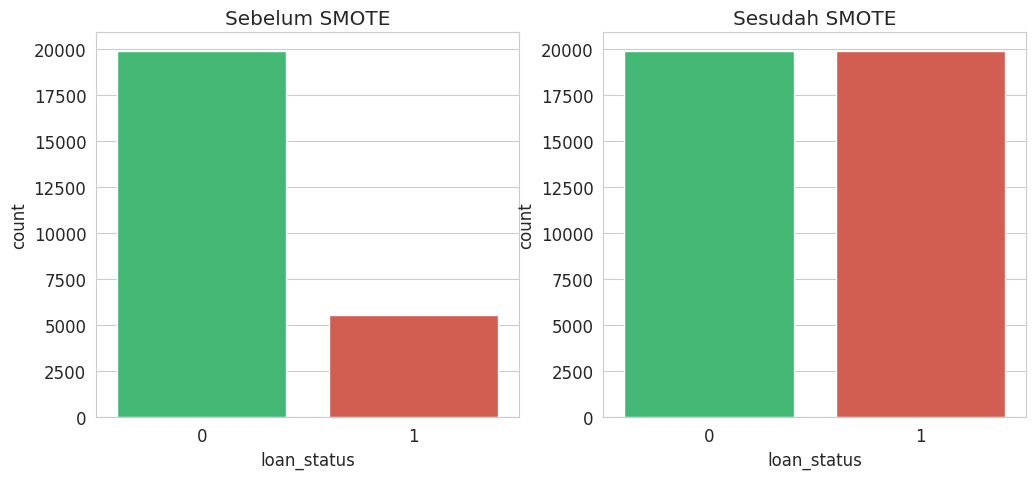

In [26]:
from imblearn.over_sampling import SMOTE

print("Jumlah kelas sebelum SMOTE (y_train):")
print(y_train.value_counts())

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE pada Training Data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\nJumlah kelas setelah SMOTE (y_train_smote):")
print(y_train_smote.value_counts())

# Visualisasi Perbandingan
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train, hue=y_train, ax=ax[0], palette=custom_palette, legend=False).set_title("Sebelum SMOTE")
sns.countplot(x=y_train_smote, hue=y_train_smote, ax=ax[1], palette=custom_palette, legend=False).set_title("Sesudah SMOTE")
plt.show()

# **MODELING BASELINE**

--- HASIL EVALUASI SEBELUM TUNING ---

=== Support Vector Machine ===
Akurasi: 0.8585

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4977
           1       0.65      0.75      0.70      1392

    accuracy                           0.86      6369
   macro avg       0.79      0.82      0.80      6369
weighted avg       0.87      0.86      0.86      6369



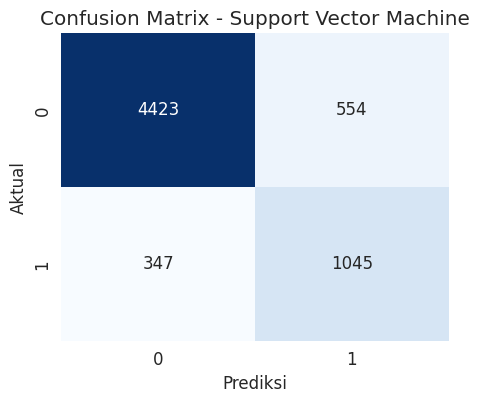

--------------------------------------------------
=== Random Forest ===
Akurasi: 0.9251

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4977
           1       0.90      0.74      0.81      1392

    accuracy                           0.93      6369
   macro avg       0.92      0.86      0.88      6369
weighted avg       0.92      0.93      0.92      6369



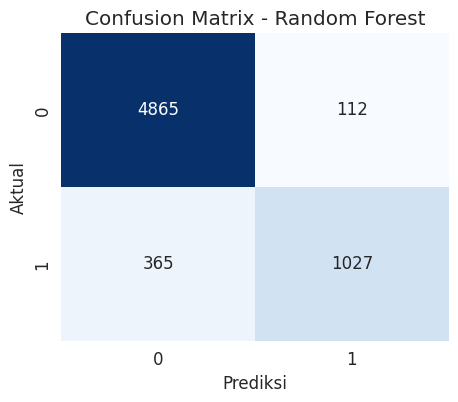

--------------------------------------------------
=== XGBoost ===
Akurasi: 0.9355

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4977
           1       0.95      0.75      0.83      1392

    accuracy                           0.94      6369
   macro avg       0.94      0.87      0.90      6369
weighted avg       0.94      0.94      0.93      6369



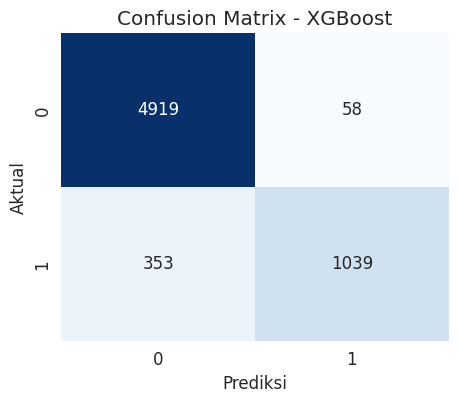

--------------------------------------------------


In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi Model
models = {
    "Support Vector Machine": SVC( kernel='rbf',C=1.0, gamma='scale',random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# Dictionary untuk menyimpan hasil
results = {}

print("--- HASIL EVALUASI SEBELUM TUNING ---\n")

for name, model in models.items():
    # Training model pada data yang sudah di-SMOTE
    model.fit(X_train_smote, y_train_smote)

    # Prediksi ke data Test (Data Asli yang di-scale, BUKAN smote agar tidak terjadi bias atau data leakage)
    y_pred = model.predict(X_test_scaled)

    # Hitung Metrik
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"=== {name} ===")
    print(f"Akurasi: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualisasi Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()
    print("-" * 50)


--- TABEL PERBANDINGAN KINERJA SEBELUM TUNING ---


,Support Vector Machine,Random Forest,XGBoost
Accuracy,0.858534,0.925106,0.935469


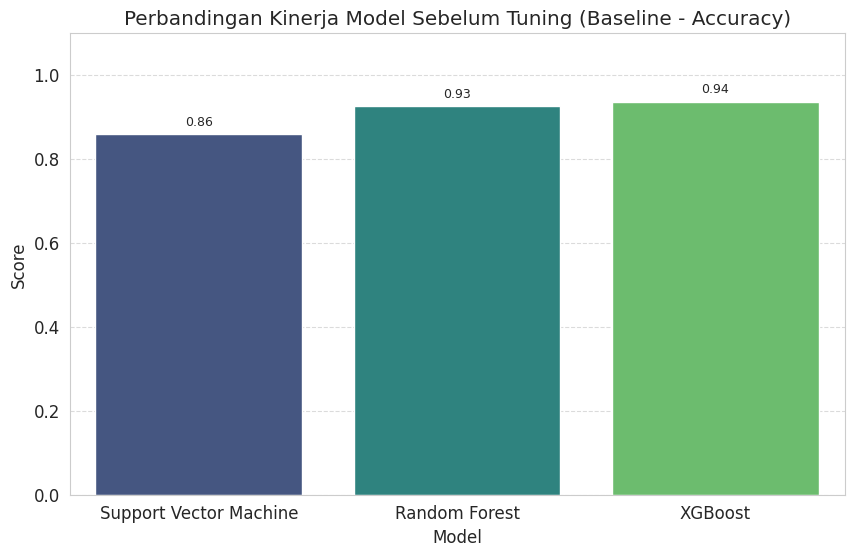

In [28]:
# Membuat DataFrame Hasil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_baseline = pd.DataFrame(results, index=['Accuracy'])

print("\n--- TABEL PERBANDINGAN KINERJA SEBELUM TUNING ---")
display(df_baseline)

# Visualisasi Perbandingan Metrik
df_melted = df_baseline.T.reset_index()
df_melted.columns = ['Model', 'Score']

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', data=df_melted, palette='viridis', hue='Model', legend=False)
plt.title('Perbandingan Kinerja Model Sebelum Tuning (Baseline - Accuracy)')
plt.ylim(0, 1.1) # Set batas y dari 0 sampai 1.1 agar label terlihat
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label angka di atas batang
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points',
                       fontsize=9)

# **HYPERPARAMETER TUNING & PERBANDINGAN AKHIR**

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

# =========================
# 1. SVM TUNING
# =========================
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

svm_random = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions=svm_params,
    n_iter=10,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

svm_random.fit(X_train_smote, y_train_smote)

best_svm = svm_random.best_estimator_
# =========================
# 2. RANDOM FOREST TUNING
# =========================
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train_smote, y_train_smote)
best_rf = rf_random.best_estimator_


# =========================
# 3. XGBOOST TUNING
# =========================
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_distributions=xgb_params,
    n_iter=10,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train_smote, y_train_smote)
best_xgb = xgb_random.best_estimator_


=== HASIL EVALUASI AKHIR SETELAH HYPERPARAMETER TUNING ===

=== SVM (Tuned) ===
Accuracy: 0.8758046789134872

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4977
           1       0.70      0.75      0.72      1392

    accuracy                           0.88      6369
   macro avg       0.82      0.83      0.82      6369
weighted avg       0.88      0.88      0.88      6369



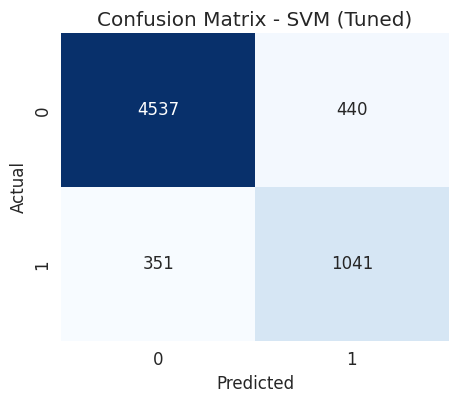

=== Random Forest (Tuned) ===
Accuracy: 0.9268330978175537

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4977
           1       0.92      0.73      0.81      1392

    accuracy                           0.93      6369
   macro avg       0.92      0.86      0.88      6369
weighted avg       0.93      0.93      0.92      6369



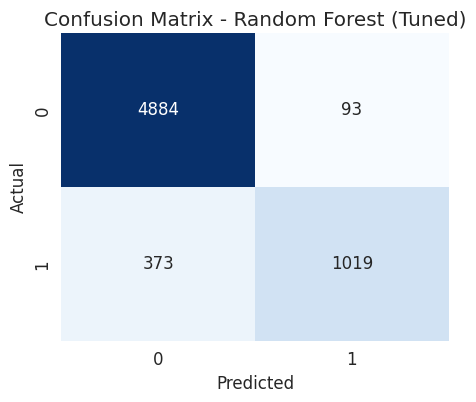

=== XGBoost (Tuned) ===
Accuracy: 0.9273041293766683

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4977
           1       0.91      0.74      0.82      1392

    accuracy                           0.93      6369
   macro avg       0.92      0.86      0.89      6369
weighted avg       0.93      0.93      0.92      6369



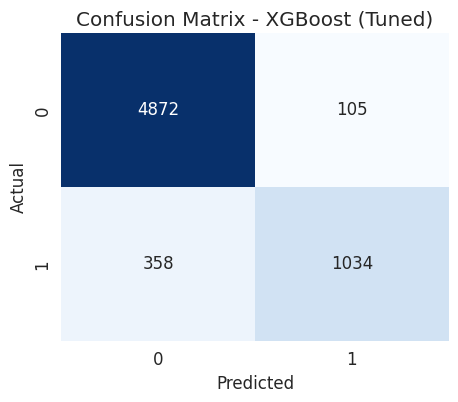

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

final_models = {
    "SVM (Tuned)": best_svm,
    "Random Forest (Tuned)": best_rf,
    "XGBoost (Tuned)": best_xgb
}

print("\n=== HASIL EVALUASI AKHIR SETELAH HYPERPARAMETER TUNING ===\n")

for name, model in final_models.items():
    y_pred = model.predict(X_test_scaled)

    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



--- TABEL PERBANDINGAN KINERJA SETELAH TUNING ---


,SVM (Tuned),Random Forest (Tuned),XGBoost (Tuned)
Accuracy,0.875805,0.926833,0.927304


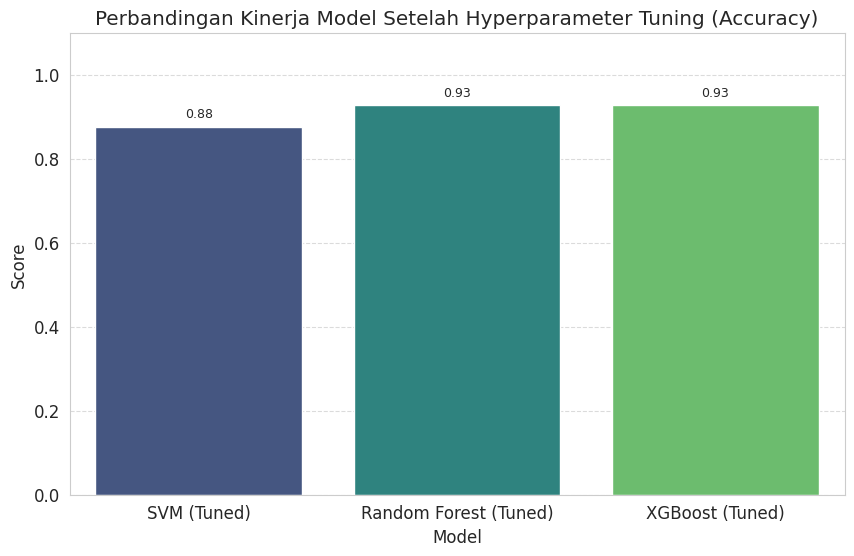

In [31]:
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary hasil setelah tuning
results_tuned = {}

final_models = {
    "SVM (Tuned)": best_svm,
    "Random Forest (Tuned)": best_rf,
    "XGBoost (Tuned)": best_xgb
}

for name, model in final_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results_tuned[name] = acc
# Membuat DataFrame hasil setelah tuning
df_tuned = pd.DataFrame(results_tuned, index=['Accuracy'])

print("\n--- TABEL PERBANDINGAN KINERJA SETELAH TUNING ---")
display(df_tuned)

# Ubah bentuk data agar mudah di-plot
df_melted_tuned = df_tuned.T.reset_index()
df_melted_tuned.columns = ['Model', 'Score']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Score',
    data=df_melted_tuned,
    palette='viridis',
    hue='Model',
    legend=False
)

plt.title('Perbandingan Kinerja Model Setelah Hyperparameter Tuning (Accuracy)')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label angka di atas batang
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 9),
        textcoords='offset points',
        fontsize=9
    )

plt.show()


# **PERBANDINGAN HASIL EVALUASI AWAL VS EVALUASI AKHIR**

In [32]:
df_compare = pd.concat(
    [df_baseline.T.rename(columns={'Accuracy':'Before Tuning'}),
     df_tuned.T.rename(columns={'Accuracy':'After Tuning'})],
    axis=1
)

display(df_compare)


,Before Tuning,After Tuning
Support Vector Machine,0.858534,NaN
Random Forest,0.925106,NaN
XGBoost,0.935469,NaN
SVM (Tuned),NaN,0.875805
Random Forest (Tuned),NaN,0.926833
XGBoost (Tuned),NaN,0.927304


# **MENYIMPAN MODEL UNTUK DEPOLY**

In [33]:
import joblib

# simpan dua model terbaik sesuai hasil visualisasi
print("Menyimpan model XGBoost dan Random Forest...")
joblib.dump(best_xgb, 'model_xgboost.pkl')
joblib.dump(best_rf, 'model_random_forest.pkl')

# Simpan Komponen Preprocessing untuk streamlit nantinya
# Tanpa ini, aplikasi Streamlit tidak akan bisa memproses input user
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("\nSUKSES! File berikut telah tersimpan:")
print("1. model_xgboost.pkl")
print("2. model_random_forest.pkl")
print("3. scaler.pkl")
print("4. label_encoders.pkl")

Menyimpan model XGBoost dan Random Forest...

SUKSES! File berikut telah tersimpan:
1. model_xgboost.pkl
2. model_random_forest.pkl
3. scaler.pkl
4. label_encoders.pkl
